In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import LinearRegression

%matplotlib inline
print("hello from docker container 002")
print("hello from docker container on macbook 001")
print("hello from fury 001")
print("hello from a swarm containers 001")
print("hello from tensorflow-gpu container")

hello from docker container 002
hello from docker container on macbook 001
hello from fury 001
hello from a swarm containers 001
hello from tensorflow-gpu container


In [2]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /home/jovyan/work/Python


In [3]:
df3 = pd.read_csv("data/cars_data_df2.csv")
df3.head(3)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0


## create a LinearRegression object

In [4]:
lm = LinearRegression()
X = df3[["highway-mpg"]]
Y = df3["price"]

# list some values of X
print(X.head(4))

lm.fit(X, Y)

print("lm.intercept_ = ",lm.intercept_)
print("lm.intercept_ = ",lm.coef_)


   highway-mpg
0           30
1           22
2           25
3           20
lm.intercept_ =  32398.971731070436
lm.intercept_ =  [-653.94786142]


## predict

In [5]:
x = {"highway-mpg":pd.Series([22.1,22.2])}
x = pd.DataFrame(x)

y_hat = lm.predict(x)
y_hat

array([17946.72399358, 17881.32920744])

## visualization

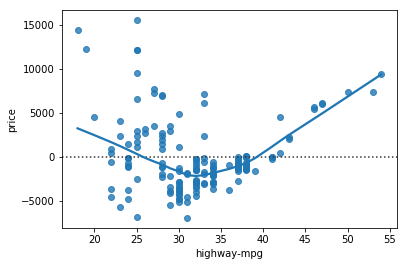

Signature:
sns.residplot(
    x,
    y,
    data=None,
    lowess=False,
    x_partial=None,
    y_partial=None,
    order=1,
    robust=False,
    dropna=True,
    label=None,
    color=None,
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot the residuals of a linear regression.

This function will regress y on x (possibly as a robust or polynomial
regression) and then draw a scatterplot of the residuals. You can
optionally fit a lowess smoother to the residual plot, which can
help in determining if there is structure to the residuals.

Parameters
----------
x : vector or string
    Data or column name in `data` for the predictor variable.
y : vector or string
    Data or column name in `data` for the response variable.
data : DataFrame, optional
    DataFrame to use if `x` and `y` are column names.
lowess : boolean, optional
    Fit a lowess smoother to the residual scatterplot.
{x, y}_partial : matrix or string(s) , optional
    Matrix with same first dimension

In [6]:
# using seaborn residplot
sns.residplot(df3["highway-mpg"], df3["price"], lowess = True)
?sns.residplot

## distribution plots


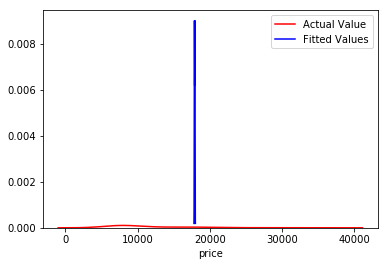

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins, or None to use Freedman-Diaconis rule.
hist : bool, optional
    Whether to plot a (normed) histogram.
kde : bool, o

In [7]:
ax_1 = sns.distplot(df3["price"], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label = "Fitted Values", ax=ax_1)

?sns.distplot

## polinomial regression

In [8]:
?np.polyfit

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
deg : int
    Degree of the fitting polynomial
rcond : float, optional
    Relative condition number of the fit. Singular values smaller than
    this relative to the largest singular value will be ignored. The
    default value is len(x)*eps, where eps is the relative precision of
    the float type, about 2e-16 in most cases.
full : bool, optional
    Switch determinin

In [9]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

# fit a polynomial regreession model of 3rd degree
z = np.polyfit(x, y, 3)
print(z)

p = np.poly1d(z)
print(p)
?np.poly1d



[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


Init signature: np.poly1d(c_or_r, r=False, variable=None)
Docstring:     
A one-dimensional polynomial class.

A convenience class, used to encapsulate "natural" operations on
polynomials so that said operations may take on their customary
form in code (see Examples).

Parameters
----------
c_or_r : array_like
    The polynomial's coefficients, in decreasing powers, or if
    the value of the second parameter is True, the polynomial's
    roots (values where the polynomial evaluates to 0).  For example,
    ``poly1d([1, 2, 3])`` returns an object that represents
    :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
    one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
r : bool, optional
    If True, `c_or_r` specifies the polynomial's roots; the default
    is False.
variable : str, optional
    Changes the variable used when printing `p` from `x` to `variable`
    (see Examples).

Examples
--------
Construct the polynomial :math:`x^2 + 2x + 3`:

>>> p 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


(-2, 2)

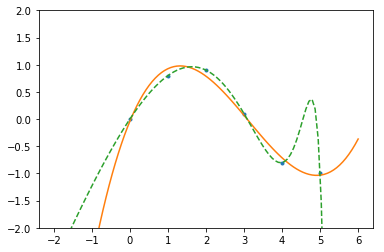

In [10]:
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)

## polinomial regression with more than one dimension
this is not supported by numpy
wee need to import *sklearn*

In [11]:
# conda install scikit-learn
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

?PolynomialFeatures



Init signature: PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Parameters
----------
degree : integer
    The degree of the polynomial features. Default = 2.

interaction_only : boolean, default = False
    If true, only interaction features are produced: features that are
    products of at most ``degree`` *distinct* input features (so not
    ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).

include_bias : boolean
    If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear model).

Examples
--------
>>> X = np.ara

In [12]:
X = np.arange(6).reshape(3,2)
print(X)
poly = PolynomialFeatures(degree=3)
print(poly.fit_transform(X))


[[0 1]
 [2 3]
 [4 5]]
[[  1.   0.   1.   0.   0.   1.   0.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


In [13]:
?StandardScaler

Init signature: StandardScaler(copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using the
`transform` method.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppo

In [14]:
data = [[13, 0], [1, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(data)
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))

[[13, 0], [1, 0], [1, 1], [1, 1]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[4.  0.5]
[[ 1.73205081 -1.        ]
 [-0.57735027 -1.        ]
 [-0.57735027  1.        ]
 [-0.57735027  1.        ]]


In [15]:
print(scaler.transform([[0,0]]))

[[-0.76980036 -1.        ]]


## pipelines

In [16]:
?Pipeline

Init signature: Pipeline(steps, memory=None)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
to None.

Read more in the :ref:`User Guide <pipeline>`.

Parameters
----------
steps : list
    List of (name, transform) tuples (implementing fit/transform) that are
    

In [17]:
input = [
    ("scale", StandardScaler()),
    ("polinomial", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
]

pipe = Pipeline(input)
# (X["horsepower", "curb-weight", "engine-size", "highway-mpg"], y)

from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate some data to play with
X, y = samples_generator.make_classification(n_informative=5, n_redundant=0, random_state=42)
X, y

# initialize a SelectKBest object, this selects top 5 features
anova_filter = SelectKBest(f_regression, k=5)

# initialize a C-Support Veector Classification
clf = svm.SVC(kernel='linear')

# put them in a pipeline
anova_svm = Pipeline([
    ('anova', anova_filter), 
    ('svc', clf)])

# set parameters of the pipeline
# params use "__" beetween the name of the element in the pipeline and the name of the parameter
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)

# generate the prediction using the pipeline
prediction = anova_svm.predict(X)

# show anova test R^2 score
anova_svm.score(X, y)

# getting the selected features chosen by anova_filter
# accesing one of the steps
anova_svm.named_steps['anova'].get_support()


# ?samples_generator.make_classification
# ?SelectKBest
# ?svm.SVC


array([False, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False])

## measures for in-sample evaluation


In [18]:
?mean_squared_error

Signature:
mean_squared_error(
    y_true,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean squared error regression loss

Read more in the :ref:`User Guide <mean_squared_error>`.

Parameters
----------
y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape = (n_samples), optional
    Sample weights.

multioutput : string in ['raw_values', 'uniform_average']
    or array-like of shape (n_outputs)
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

Returns
-------
loss : float or ndarray of floats
    A non-negative floating p

In [19]:

# generating some input data
some_input = np.arange(1,101,1).reshape(-1,1)
# some_input
?np.reshape

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta